### Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [34]:
df = pd.read_csv('/content/drive/MyDrive/NLP and CV-June24/Day 8/UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### Distribution of Resume Categories

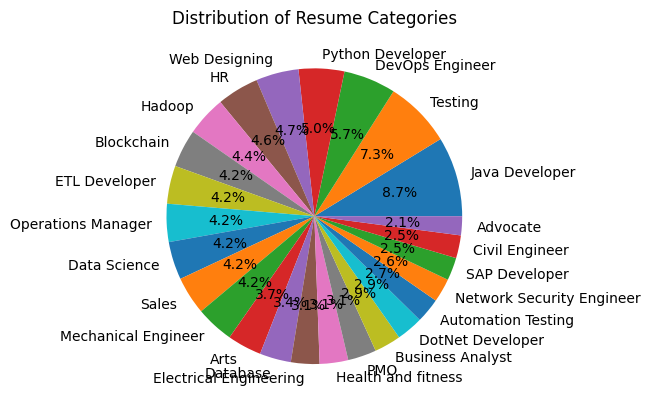

In [35]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
_ = plt.title('Distribution of Resume Categories')

### Distribution of Job Categories

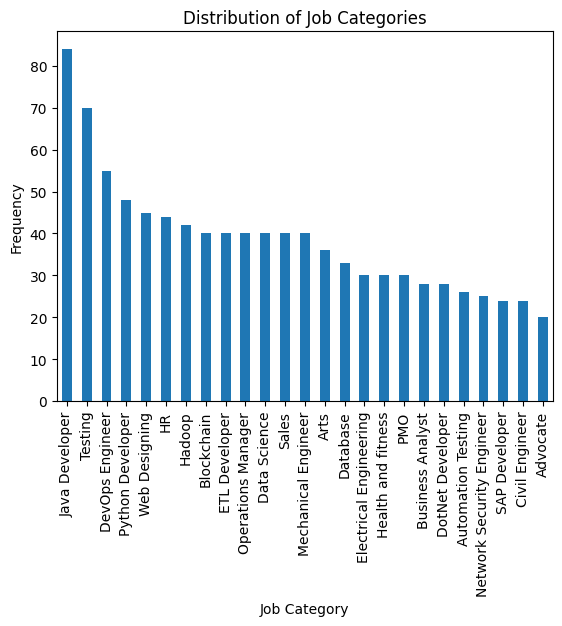

In [36]:
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Job Categories')

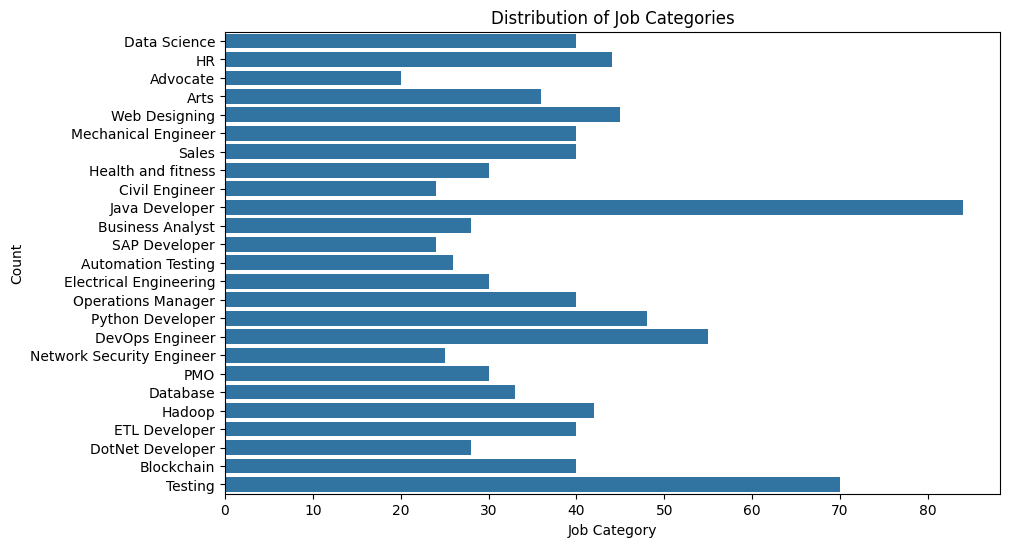

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(y = df['Category'])
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.title('Distribution of Job Categories')
plt.show()

### Seperate the input and output data

In [38]:
x = df['Resume']
y = df['Category']

### Exploratory Data Analysis

In [39]:
len(set(y))

25

In [40]:
java = x[y == 'Java Developer']
java

319    Education Details \r\nAugust 2010 to May 2017 ...
320    Technical Skills (Trained / Project Acquired S...
321    TECHNICAL SKILLS Skills: Java, SQL, PL/SQL, C,...
322    TECHNICAL STRENGTHS Computer Language Java/J2E...
323    Education Details \r\nJanuary 2013 Master of E...
                             ...                        
398    Computer Skills: Languages And Script: JSP, Se...
399    Education Details \r\nJanuary 2016 B.E Informa...
400    TECHNICAL SKILLS Programming Languages: Java (...
401    SKILLS: - 1) Team leading 2) Self-motivated 3)...
402    Skills â¢ Language: Java â¢ Operating System...
Name: Resume, Length: 84, dtype: object

### Tokenize

In [41]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [42]:
java = " ".join(java)
print(java)

Education Details 
August 2010 to May 2017 BE Electronics & Communication Jabalpur, Madhya Pradesh Takshshila institute of technology
Java developer 


Skill Details 
Java, Javascript,- Exprience - 6 monthsCompany Details 
company - Wab It Softwere Pvt.  Ltd.
description - Jr. Java Developer Technical Skills (Trained / Project Acquired Skills) â¢ Languages Known: C, C++, J2EE, Spring, Hibernate. â¢ Testing: Functional Testing, Manual Testing. â¢ Operating Systems: Windows & Linux. â¢ Packages: MS-office. â¢ Databases: My SQL & PostgreSQL.Education Details 
January 2013 to January 2017 B.E Computer Science and Engineering  RTMNU University - Jhulelal Institute of Technology
January 2011 to January 2013 HSC  Nagpur, Maharashtra Maharashtra State Board - Dayanand Arya Kanya Junior College
January 2010 to January 2011 SSC  Nagpur, Maharashtra Maharashtra State Board
Java Developer 

Java Developer - Inouvelle Ventures Private Limited
Skill Details 
J2EE- Exprience - 17 months
C++- Exp

In [43]:
java = word_tokenize(java)
java

['Education',
 'Details',
 'August',
 '2010',
 'to',
 'May',
 '2017',
 'BE',
 'Electronics',
 '&',
 'Communication',
 'Jabalpur',
 ',',
 'Madhya',
 'Pradesh',
 'Takshshila',
 'institute',
 'of',
 'technology',
 'Java',
 'developer',
 'Skill',
 'Details',
 'Java',
 ',',
 'Javascript',
 ',',
 '-',
 'Exprience',
 '-',
 '6',
 'monthsCompany',
 'Details',
 'company',
 '-',
 'Wab',
 'It',
 'Softwere',
 'Pvt',
 '.',
 'Ltd.',
 'description',
 '-',
 'Jr.',
 'Java',
 'Developer',
 'Technical',
 'Skills',
 '(',
 'Trained',
 '/',
 'Project',
 'Acquired',
 'Skills',
 ')',
 'â\x80¢',
 'Languages',
 'Known',
 ':',
 'C',
 ',',
 'C++',
 ',',
 'J2EE',
 ',',
 'Spring',
 ',',
 'Hibernate',
 '.',
 'â\x80¢',
 'Testing',
 ':',
 'Functional',
 'Testing',
 ',',
 'Manual',
 'Testing',
 '.',
 'â\x80¢',
 'Operating',
 'Systems',
 ':',
 'Windows',
 '&',
 'Linux',
 '.',
 'â\x80¢',
 'Packages',
 ':',
 'MS-office',
 '.',
 'â\x80¢',
 'Databases',
 ':',
 'My',
 'SQL',
 '&',
 'PostgreSQL.Education',
 'Details',
 'Januar

In [44]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('')

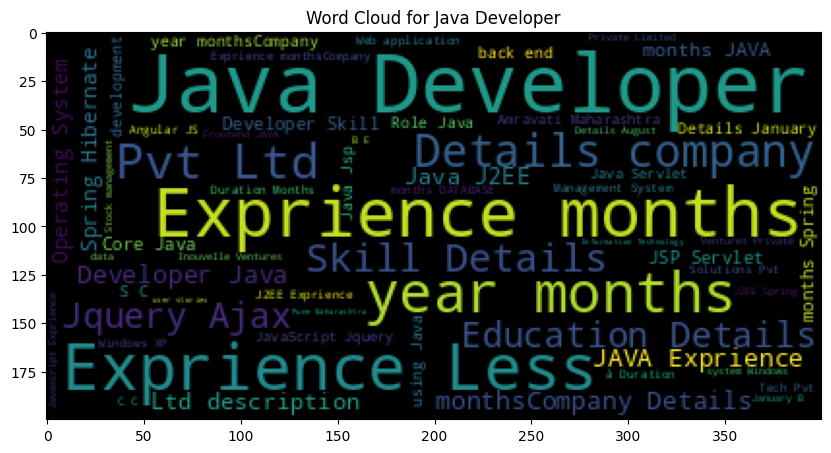

In [45]:
wc = WordCloud(max_words = 100).generate(" ".join(java))
plt.figure(figsize=(10, 6))
plt.imshow(wc)
plt.title('Word Cloud for Java Developer');

### Cleaning the dataset

In [61]:
import re
import string

In [52]:
# def cleanResume(resumeText):
#     resumeText = re.sub('http\S+\s*', ' ', resumeText)  # Remove URLs
#     resumeText = re.sub('RT|cc', ' ', resumeText)  # Remove RT and cc
#     resumeText = re.sub('#\S+', ' ', resumeText)  # Remove Hashtags
#     resumeText = re.sub('@\S+', ' ', resumeText)  # Remove Mentions
#     resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # Remove Punctuations
#     resumeText = re.sub('[^\x00\x7f]', ' ', resumeText)
#     resumeText = re.sub('\s+', ' ', resumeText)  # Remove extra spaces
#     return resumeText

In [58]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText) # remove RT and CC
    resumeText = re.sub('#\S+', ' ', resumeText) # remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText) # remove mentions
    resumeText = re.sub('[%s]' % re.escape(string.punctuation), ' ', resumeText) # remove punctuations
    resumeText = re.sub('[^\x00-\x7f]', ' ', resumeText) # remove non-ASCII characters
    resumeText = re.sub('\s+', ' ', resumeText) # remove extra whitespace

    return resumeText

In [59]:
x[123]

"â\x80¢ Operating Systems: Windows XP / Vista / 07Education Details \r\nJanuary 2018 M.F.A painting Nagpur, Maharashtra Nagpur University\r\nJanuary 2016 B.F.A. Painting Nagpur, Maharashtra Nagpur University\r\nJanuary 2012 Diploma Art  Maharashtra State Board\r\nJanuary 2010 H.S.C.   Maharashtra State Board\r\nJanuary 2008 S.S.C.   Maharashtra State Board\r\nFine arts lecturer \r\n\r\n\r\nSkill Details \r\nMs-Cit- Exprience - 96 monthsCompany Details \r\ncompany - Shubhankan Fine Arts College, indore\r\ndescription - â\x80¢ I'm doing a job as a Lecturer in Shubhankan Fine Arts College Indore from Nov 2018.\r\nâ\x80¢ I'm an Artist, completed ATD, BFA and MFA in painting. \r\nâ\x80¢ I'm searching for a job in my faculty in my area and comfort place. To improve my knowledge and experience in this field.\r\ncompany - \r\ndescription - I have a experience of classes of painting, rangoli, drawing, summer classes, etc\r\n\r\nHealth: Physical Disability ( Orthopedically)"

In [63]:
cleaned = cleanResume(x[123])
cleaned

' Operating Systems Windows XP Vista 07Education Details January 2018 M F A painting Nagpur Maharashtra Nagpur University January 2016 B F A Painting Nagpur Maharashtra Nagpur University January 2012 Diploma Art Maharashtra State Board January 2010 H S C Maharashtra State Board January 2008 S S C Maharashtra State Board Fine arts lecturer Skill Details Ms Cit Exprience 96 monthsCompany Details company Shubhankan Fine Arts College indore description I m doing a job as a Lecturer in Shubhankan Fine Arts College Indore from Nov 2018 I m an Artist completed ATD BFA and MFA in painting I m searching for a job in my faculty in my area and comfort place To improve my knowledge and experience in this field company description I have a experience of classes of painting rangoli drawing summer classes etc Health Physical Disability Orthopedically '

In [64]:
cleaned = x.apply(cleanResume)
cleaned

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

### TF*IDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfidf = TfidfVectorizer(stop_words='english')

In [67]:
x_new = tfidf.fit_transform(cleaned)
x_new

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [68]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

### Cross Validation

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 7351), (241, 7351), (721,), (241,))

### Build the model

In [73]:
from sklearn.neighbors import NearestCentroid

In [74]:
nn = NearestCentroid()

In [75]:
nn.fit(X_train, y_train)

NearestCentroid()

### Performance Evaluation

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [76]:
y_pred = nn.predict(X_test)

In [78]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9875518672199171


In [79]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.83      0.83      0.83         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       0.91      1.00      0.95        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00 

In [81]:
confusion_matrix(y_test, y_pred)

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0, 

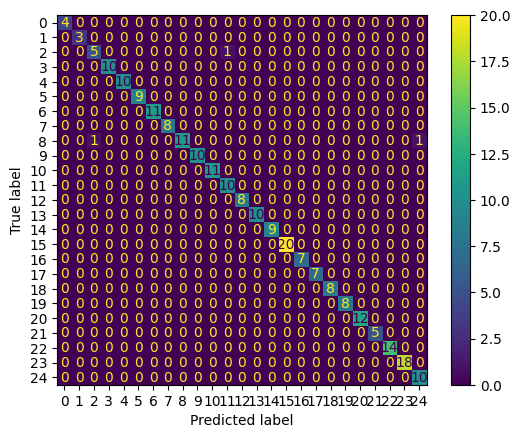

In [83]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
confusion_matrix_display.plot();

# Test for a Sample Resume

In [92]:
sample_resume = open('/content/drive/MyDrive/NLP and CV-June24/Day 8/Sample_resume.txt').read()
sample_resume

'Tejashree Pishe \nJr. Machine Learning Engineer. (MITU Research) \nEXPERIENCE \nMITU Research, New Sangavi, Pune \n Feb 2021 till date \nHiko Technology Pvt. Ltd., Baner, Pune Full Time Internship \nAugust 2019 May 2020. \n \nKEY PROJECTS \nPredictive Analytics Implemented for Pistachio Types over quality parameter database\nStudy the origin, trade business and nutritional values over Pistachio types.\nReview the quality of pistachio types over its quality  \npararameters.\nCritically evaluate and data preprocessing over the database.\nUsed the Resampling techniques to work on imbalanced data set.\nIdentify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis.\nFind out the best suitable algorithm with more than 90% accuracy to predict the type of pistachio over new data.\nUpdating and upgrading the model with non-predictable data.\nTechnologies: Python for Data Science, NumPY, Panda,\nMachine Learning Algorithms \n \nDesign and de

In [93]:
data = cleanResume(sample_resume)
data

'Tejashree Pishe Jr Machine Learning Engineer MITU Research EXPERIENCE MITU Research New Sangavi Pune Feb 2021 till date Hiko Technology Pvt Ltd Baner Pune Full Time Internship August 2019 May 2020 KEY PROJECTS Predictive Analytics Implemented for Pistachio Types over quality parameter database Study the origin trade business and nutritional values over Pistachio types Review the quality of pistachio types over its quality pararameters Critically evaluate and data preprocessing over the database Used the Resampling techniques to work on imbalanced data set Identify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis Find out the best suitable algorithm with more than 90 a uracy to predict the type of pistachio over new data Updating and upgrading the model with non predictable data Technologies Python for Data Science NumPY Panda Machine Learning Algorithms Design and development of Decision support System for selection of New Resu

In [94]:
data = pd.Series(data)
data

0    Tejashree Pishe Jr Machine Learning Engineer M...
dtype: object

In [95]:
y_pred1 = nn.predict(tfidf.transform(data))
y_pred1

array(['Data Science'], dtype=object)

In [97]:
!pip install PyPDF2
import PyPDF2

# Open the PDF file in read-binary mode
pdf_file_path = '/content/drive/MyDrive/NLP and CV-June24/Day 8/Manasi Malge Resume - CDAC.pdf'
with open(pdf_file_path, 'rb') as pdf_file:
    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Extract text from the PDF
    num_pages = len(pdf_reader.pages)
    manasi_resume_text = ""
    for page_num in range(num_pages):
        page = pdf_reader.pages[page_num]
        manasi_resume_text += page.extract_text()

# Now you can work with the extracted text
print(manasi_resume_text)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00
MANASI MALGE
Enthusiastic recent graduate with strong leadership abilities, excellent communication skills, problem-
solving and analytical skills having proficiency in Artificial Intelligence, Machine Learning and Deep
Learning with a skill-set of Java, Python, Natural Language Processing and Data Visualization along with
the knowledge of Large Language Model (LLM), Computer Vision (CV), and tools such as Tableau and
PowerBi. 
Technical Skills and Strengths
Python, Java
Data Analytics
Machine LearningPragmatic
Eye for Detail
Time ManagementNatural Language Processing
Computer Vision
Google Cloud PlatformStrategic Thinking
Diligent
Resilient
Education Details
Center for Development of Advanced Computing, Pune 
Post Graduate Diploma in Artificial Intelligence | CGPA: | March 2024 - August 2024 
Cummins College of Engineering, for Women, Nagpur | Nagpur University
Bachelor of Computer Engineering | CGPA: 8.

In [98]:
data1 = cleanResume(manasi_resume_text)
data1

'MANASI MALGE Enthusiastic recent graduate with strong leadership abilities excellent communication skills problem solving and analytical skills having proficiency in Artificial Intelligence Machine Learning and Deep Learning with a skill set of Java Python Natural Language Processing and Data Visualization along with the knowledge of Large Language Model LLM Computer Vision CV and tools such as Tableau and PowerBi Technical Skills and Strengths Python Java Data Analytics Machine LearningPragmatic Eye for Detail Time ManagementNatural Language Processing Computer Vision Google Cloud PlatformStrategic Thinking Diligent Resilient Education Details Center for Development of Advanced Computing Pune Post Graduate Diploma in Artificial Intelligence CGPA March 2024 August 2024 Cummins College of Engineering for Women Nagpur Nagpur University Bachelor of Computer Engineering CGPA 8 89 2018 2022 New English Junior College Nagpur Maharashtra State Board 12th Computer Science 79 08 2017 2018 Proj

In [99]:
data1 = pd.Series(data1)
data1

0    MANASI MALGE Enthusiastic recent graduate with...
dtype: object

In [100]:
y_pred_m = nn.predict(tfidf.transform(data1))
y_pred_m

array(['Data Science'], dtype=object)